Go to http://research.stlouisfed.org/fred2/series/SP500/downloaddata and download S&P 500 data for the last 10 years. You will get a time
series of prices $P_t$, $t = 1,\ldots,T$. Then, compute the returns ignoring dividends $R_{t+1} = P_{t+1}/{P_t}$
Plot the empirical distribution of $R_t − 1$ and of $\log R_t$.
What does it look like? Does it look like normal ? You can use Matlab functions hist, histfit, and normfit

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import math

In [2]:
df = pd.read_csv('SP500.csv')

returns = [1]
for i in range(len(df)-1):
    values = df.loc[i:i+1, 'SP500']
    if values[i+1] == '.' or values[i] == '.':
        rate = np.NaN
    else:
        rate = float(values[i+1]) / float(values[i])
    returns.append(rate)
    
df['returns'] = returns

df['r-1'] = df['returns'] - 1

df['log_r'] = np.log(df['returns'])


Text(0.5, 1.0, 'Fit results(R-1): mu = 0.0006,  std = 0.0106')

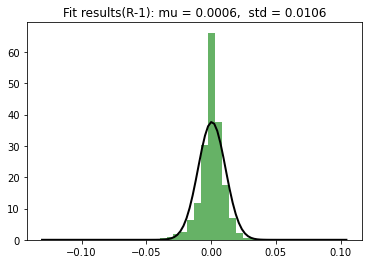

In [3]:
df = pd.read_pickle('transformed.pkl')

fit = [x for x in df['r-1'] if math.isnan(x) == False]
mu, std = norm.fit(fit)

plt.hist(df['r-1'], bins=40, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results(R-1): mu = %.4f,  std = %.4f" % (mu, std)
plt.title(title)

Text(0.5, 1.0, 'Fit results(log_R): mu = 0.0005,  std = 0.0106')

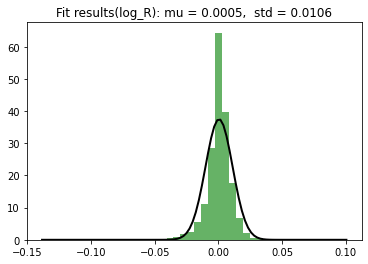

In [4]:
fit = [x for x in df['log_r'] if math.isnan(x) == False]
mu, std = norm.fit(fit)

plt.hist(df['log_r'], bins=40, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results(log_R): mu = %.4f,  std = %.4f" % (mu, std)
plt.title(title)